**Importing the libraries:**

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.layers.normalization import BatchNormalization
from keras.datasets import cifar10

Using TensorFlow backend.


**Load the cifar10 dataset:**

In [0]:
(X_train, y_train), (X_val, y_val) = cifar10.load_data()

**Normalize the input data:**

In [0]:
X_train = X_train.astype('float32') / 255.
X_val = X_val.astype('float32') / 255.

**One - hot encode the labels:**

In [0]:
n_classes = 10

y_train = to_categorical(y_train, n_classes)
y_val = to_categorical(y_val, n_classes)

input_shape = X_train[0].shape

**Define the CNN architecture and output the network architecture:**

In [5]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), 
                 input_shape = input_shape,
                 padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size = (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))

model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size = (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))

model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size = (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(128, kernel_size = (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(n_classes, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)  

**Define a callback to prevent overfitting:**

In [0]:
callbacks = [EarlyStopping(monitor = 'val_acc', patience = 5,
                           verbose = 1)]

**Set the network hyperparameters and train the first model:**

In [7]:
n_epochs = 300
batch_size = 256

history = model.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = n_epochs,
                    verbose = 1,
                    validation_data = (X_val, y_val),
                    callbacks = callbacks)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/300
50000/50000 [==============================] - 15s 301us/step - loss: 1.9022 - acc: 0.2820 - val_loss: 1.5597 - val_acc: 0.4212
Epoch 2/300
50000/50000 [==============================] - 13s 250us/step - loss: 1.4508 - acc: 0.4642 - val_loss: 1.2310 - val_acc: 0.5522
Epoch 3/300
50000/50000 [==============================] - 12s 249us/step - loss: 1.2139 - acc: 0.5601 - val_loss: 1.0509 - val_acc: 0.6268
Epoch 4/300
50000/50000 [==============================] - 13s 251us/step - loss: 1.0562 - acc: 0.6232 - val_loss: 0.9081 - val_acc: 0.6745
Epoch 5/300
50000/50000 [==============================] - 13s 250us/step - loss: 0.9583 - acc: 0.6613 - val_loss: 0.9512 - val_acc: 0.6570
Epoch 6/300
50000/50000 [==============================] - 13s 250us/step - loss: 0.8787 - acc: 0.6891 - val_loss: 0.7736 - val_acc: 0.7250
Epoch 7/300
50000/50000 [==============================] - 12s

**Now, let's add batch normalization to our network architecture:**

In [8]:
model_bn = Sequential()

model_bn.add(Conv2D(32, kernel_size = (3, 3), 
                    input_shape = input_shape, padding = 'same'))
model_bn.add(Activation('relu'))
model_bn.add(BatchNormalization())
model_bn.add(Conv2D(32, kernel_size = (3, 3), padding = 'same'))
model_bn.add(Activation('relu'))
model_bn.add(BatchNormalization())
model_bn.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))

model_bn.add(Dropout(0.25))

model_bn.add(Conv2D(64, kernel_size = (3, 3), padding = 'same'))
model_bn.add(Activation('relu'))
model_bn.add(BatchNormalization())
model_bn.add(Conv2D(64, kernel_size = (3, 3), padding = 'same'))
model_bn.add(Activation('relu'))
model_bn.add(BatchNormalization())
model_bn.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))

model_bn.add(Dropout(0.25))

model_bn.add(Conv2D(128, kernel_size = (3, 3), padding = 'same'))
model_bn.add(Activation('relu'))
model_bn.add(BatchNormalization())
model_bn.add(Conv2D(128, kernel_size = (3, 3), padding = 'same'))
model_bn.add(Activation('relu'))
model_bn.add(BatchNormalization())
model_bn.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))

model_bn.add(Dropout(0.25))

model_bn.add(Flatten())
model_bn.add(Dense(512, activation = 'relu'))
model_bn.add(BatchNormalization())
model_bn.add(Dropout(0.5))
model_bn.add(Dense(128, activation = 'relu'))
model_bn.add(Dense(n_classes, activation = 'softmax'))

model_bn.compile(loss = 'categorical_crossentropy',
                 optimizer = 'adam',
                 metrics = ['accuracy'])

model_bn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
__________

**Train the model which includes batch normalization:**

In [9]:
history_bn = model_bn.fit(X_train, y_train,
                          batch_size = batch_size,
                          epochs = n_epochs,
                          verbose = 1,
                          validation_data = (X_val, y_val),
                          callbacks = callbacks)

Train on 50000 samples, validate on 10000 samples
Epoch 1/300
50000/50000 [==============================] - 19s 386us/step - loss: 1.6223 - acc: 0.4366 - val_loss: 2.2351 - val_acc: 0.3623
Epoch 2/300
50000/50000 [==============================] - 17s 349us/step - loss: 1.1149 - acc: 0.6005 - val_loss: 1.0877 - val_acc: 0.6362
Epoch 3/300
50000/50000 [==============================] - 17s 349us/step - loss: 0.9129 - acc: 0.6754 - val_loss: 0.9672 - val_acc: 0.6621
Epoch 4/300
50000/50000 [==============================] - 17s 349us/step - loss: 0.7920 - acc: 0.7177 - val_loss: 0.7556 - val_acc: 0.7405
Epoch 5/300
50000/50000 [==============================] - 17s 347us/step - loss: 0.7122 - acc: 0.7472 - val_loss: 0.7313 - val_acc: 0.7466
Epoch 6/300
50000/50000 [==============================] - 17s 348us/step - loss: 0.6508 - acc: 0.7706 - val_loss: 0.7036 - val_acc: 0.7527
Epoch 7/300
50000/50000 [==============================] - 17s 348us/step - loss: 0.6022 - acc: 0.7857 - val_l

**Let's plot the validation accuracy of both models to compare the performance:**

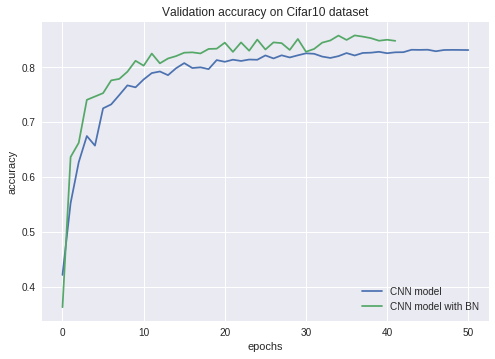

In [10]:
val_acc = history.history['val_acc']
val_acc_bn = history_bn.history['val_acc']

plt.plot(range(len(val_acc)), val_acc, label = 'CNN model')
plt.plot(range(len(val_acc_bn)), val_acc_bn, label = 'CNN model with BN')
plt.title('Validation accuracy on Cifar10 dataset')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

**Printing some statistics involving the models:**

In [11]:
print("Maximum accuracy of CNN model with BN: ", max(val_acc_bn))
print("Maximum accuracy of CNN model: ", max(val_acc))

print("Number of epochs in CNN model with BN: ", len(val_acc_bn))
print("Number of epochs in CNN model: ", len(val_acc))

Maximum accuracy of CNN model with BN:  0.858
Maximum accuracy of CNN model:  0.8319
Number of epochs in CNN model with BN:  42
Number of epochs in CNN model:  51
